# Settings

In [1]:
!git clone https://github.com/QuocThinh73/HCMAI2025.git

Cloning into 'HCMAI2025'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 155 (delta 75), reused 118 (delta 42), pack-reused 0 (from 0)
Receiving objects: 100% (155/155), 32.48 MiB | 17.02 MiB/s, done.
Resolving deltas: 100% (75/75), done.


In [2]:
%cd HCMAI2025

/content/HCMAI2025


In [3]:
!pip install open_clip_torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
  

In [4]:
!pip install faiss-cpu==1.11.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 14.7 MB/s eta 0:00:00


# Tải và Giải nén

In [5]:
!gdown --id 1qROoBnsGqt3hoNOz9AwA1cOO207E12Gd

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1qROoBnsGqt3hoNOz9AwA1cOO207E12Gd
From (redirected): https://drive.google.com/uc?id=1qROoBnsGqt3hoNOz9AwA1cOO207E12Gd&confirm=t&uuid=f2f8bfa1-90b4-4210-b54a-ce53bd60f179
To: /content/HCMAI2025/data.zip
100% 148M/148M [00:00<00:00, 224MB/s]


In [6]:
!unzip data.zip -d .

Archive:  data.zip
   creating: ./data/
   creating: ./data/keyframes/
  inflating: ./data/keyframes/video1705_01_0.jpg  
  inflating: ./data/keyframes/video1705_01_10031.jpg  
  inflating: ./data/keyframes/video1705_01_10071.jpg  
  inflating: ./data/keyframes/video1705_01_10110.jpg  
  inflating: ./data/keyframes/video1705_01_10150.jpg  
  inflating: ./data/keyframes/video1705_01_10151.jpg  
  inflating: ./data/keyframes/video1705_01_10209.jpg  
  inflating: ./data/keyframes/video1705_01_10268.jpg  
  inflating: ./data/keyframes/video1705_01_10327.jpg  
  inflating: ./data/keyframes/video1705_01_10386.jpg  
  inflating: ./data/keyframes/video1705_01_10387.jpg  
  inflating: ./data/keyframes/video1705_01_10438.jpg  
  inflating: ./data/keyframes/video1705_01_10489.jpg  
  inflating: ./data/keyframes/video1705_01_1054.jpg  
  inflating: ./data/keyframes/video1705_01_10540.jpg  
  inflating: ./data/keyframes/video1705_01_1055.jpg  
  inflating: ./data/keyframes/video1705_01_10591.jpg  


# Build FAISS

In [7]:
import glob

image_paths = sorted(glob.glob("data/keyframes/*.jpg", recursive=True))
image_paths

['data/keyframes/video1705_01_0.jpg',
 'data/keyframes/video1705_01_10031.jpg',
 'data/keyframes/video1705_01_10071.jpg',
 'data/keyframes/video1705_01_10110.jpg',
 'data/keyframes/video1705_01_10150.jpg',
 'data/keyframes/video1705_01_10151.jpg',
 'data/keyframes/video1705_01_10209.jpg',
 'data/keyframes/video1705_01_10268.jpg',
 'data/keyframes/video1705_01_10327.jpg',
 'data/keyframes/video1705_01_10386.jpg',
 'data/keyframes/video1705_01_10387.jpg',
 'data/keyframes/video1705_01_10438.jpg',
 'data/keyframes/video1705_01_10489.jpg',
 'data/keyframes/video1705_01_1054.jpg',
 'data/keyframes/video1705_01_10540.jpg',
 'data/keyframes/video1705_01_1055.jpg',
 'data/keyframes/video1705_01_10591.jpg',
 'data/keyframes/video1705_01_10592.jpg',
 'data/keyframes/video1705_01_10650.jpg',
 'data/keyframes/video1705_01_10709.jpg',
 'data/keyframes/video1705_01_10767.jpg',
 'data/keyframes/video1705_01_10826.jpg',
 'data/keyframes/video1705_01_10827.jpg',
 'data/keyframes/video1705_01_10891.jpg'

In [8]:
import open_clip

open_clip.list_pretrained()

[('RN50', 'openai'),
 ('RN50', 'yfcc15m'),
 ('RN50', 'cc12m'),
 ('RN101', 'openai'),
 ('RN101', 'yfcc15m'),
 ('RN50x4', 'openai'),
 ('RN50x16', 'openai'),
 ('RN50x64', 'openai'),
 ('ViT-B-32', 'openai'),
 ('ViT-B-32', 'laion400m_e31'),
 ('ViT-B-32', 'laion400m_e32'),
 ('ViT-B-32', 'laion2b_e16'),
 ('ViT-B-32', 'laion2b_s34b_b79k'),
 ('ViT-B-32', 'datacomp_xl_s13b_b90k'),
 ('ViT-B-32', 'datacomp_m_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_clip_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_laion_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_image_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_text_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_basic_s128m_b4k'),
 ('ViT-B-32', 'commonpool_m_s128m_b4k'),
 ('ViT-B-32', 'datacomp_s_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_clip_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_laion_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_image_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_text_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_basic_s13m_b4k'),
 ('ViT-B-32', 'commonpool_s_s13m_b4k'),
 ('ViT-

In [9]:
from models.openclip import OpenCLIP

model = OpenCLIP(backbone="ViT-B-32", pretrained="laion2b_s34b_b79k")

open_clip_model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [10]:
from faiss_index import FaissIndex

my_faiss = FaissIndex(model=model)

In [11]:
model_name = "openclip"

my_faiss.build(image_paths=image_paths, model_name=model_name)

# Test

In [12]:
import matplotlib.pyplot as plt
from PIL import Image

def display_results(paths, scores=None, max_images=5):
    """Display image results in Colab."""
    n = min(len(paths), max_images)
    fig, axes = plt.subplots(1, n, figsize=(15, 3))

    if n == 1:
        axes = [axes]

    for i in range(n):
        try:
            img = Image.open(paths[i])
            axes[i].imshow(img)
            if scores is not None:
                axes[i].set_title(f"Score: {scores[i]:.4f}")
            axes[i].axis('off')
        except Exception as e:
            print(f"Error displaying image {paths[i]}: {e}")

    plt.tight_layout()
    plt.show()

In [13]:
# Load FAISS index
index_path = f"database/{model_name}_faiss.bin"
id2path_path = f"database/{model_name}_id2path.pkl"

my_faiss.load(index_path, id2path_path)

1. Score: 0.2899, Index: 859, Path: data/keyframes/video1705_03_9955.jpg
2. Score: 0.2899, Index: 554, Path: data/keyframes/video1705_02_9955.jpg
3. Score: 0.2881, Index: 809, Path: data/keyframes/video1705_03_7768.jpg
4. Score: 0.2881, Index: 504, Path: data/keyframes/video1705_02_7768.jpg
5. Score: 0.2856, Index: 815, Path: data/keyframes/video1705_03_8010.jpg


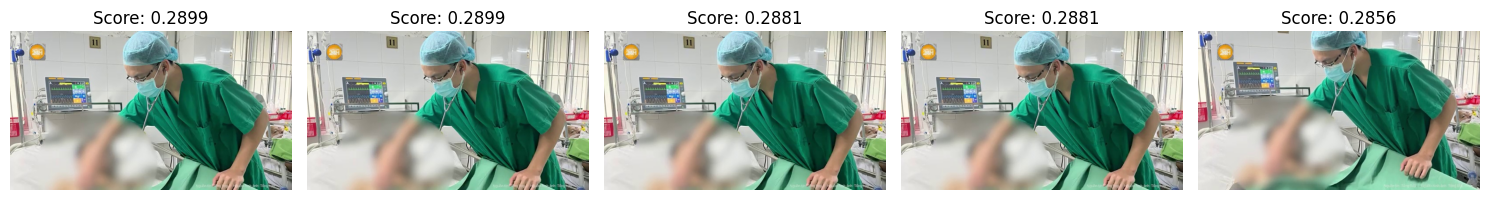

In [14]:
query = "Doctor"
scores, indices, paths = my_faiss.text_search(query, top_k=5)

for i, (score, idx, path) in enumerate(zip(scores, indices, paths)):
           print(f"{i+1}. Score: {score:.4f}, Index: {idx}, Path: {path}")

display_results(paths, scores, 5)